In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import figure_factory as FF

import numpy as np
import pandas as pd
import scipy

from scipy import signal

In [3]:
import wave
import numpy as np

In [4]:
import numpy, numpy.fft as fft

In [5]:
from math import *
from matplotlib import pyplot as plt

In [6]:
import pandas as pd

In [7]:
import scipy.io

In [19]:
import os

In [24]:
##scipy to load mat lab files
female1plastic = scipy.io.loadmat('12-1-2017/female1_plastic_A_1.mat')
f1data = female1plastic['data']
f1data.shape

(441000, 1)

In [20]:
#opens wav player and plays the sound....
os.system("start 2_female1cb_LDVraw.wav")

0

In [9]:
for i in female1plastic:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("female1_plastic.csv"),female1plastic[i],delimiter=',')

In [10]:
##Function to convert the mat lab data into csv for pandas
def convert_to_CSV(data):
    for i in data:
        if '__' not in i and 'readme' not in i:
            np.savetxt(("data.csv"),data[i],delimiter=',')

In [11]:
user_cols = ['Data']
F1_plastic = pd.read_table('female1_plastic.csv', header=None, names = user_cols)

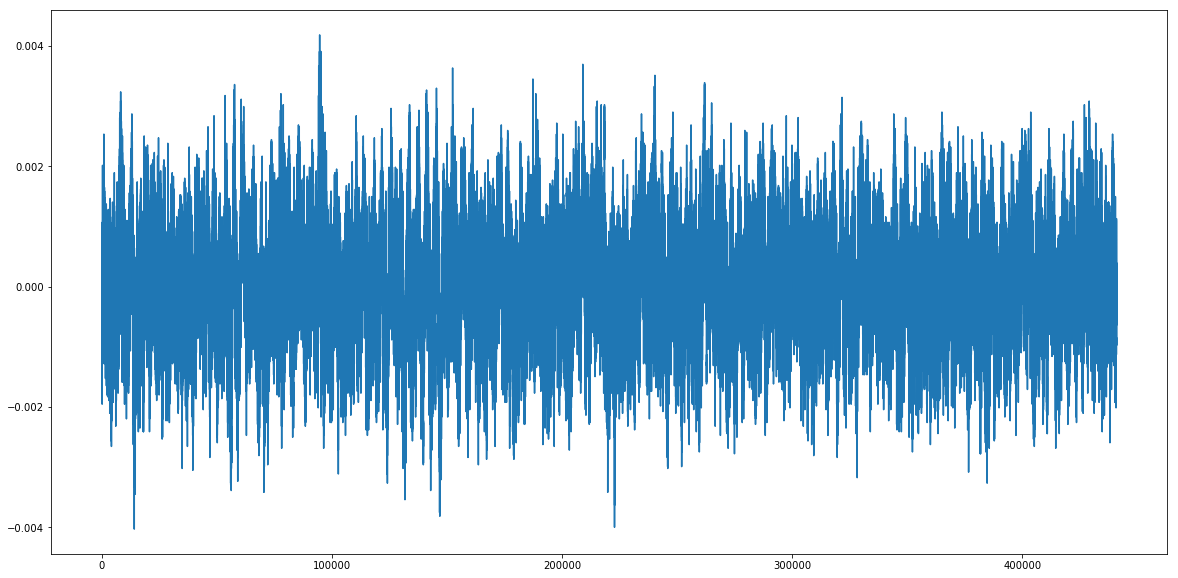

In [12]:
plt.figure(figsize=(20,10))##change the size of the charts
plt.plot(F1_plastic)
plt.show()

In [14]:
import scipy.io.wavfile
f1wave = scipy.io.wavfile.read("2_female1cb_LDVraw.wav", mmap=False)

In [12]:
male6plastic = scipy.io.loadmat('12-1-2017/male6_plastic_A_1.mat')

In [13]:
convert_to_CSV(male6plastic)

In [14]:
M6_plastic = pd.read_table('male6_plastic_A_1.csv', header=None, names = user_cols)

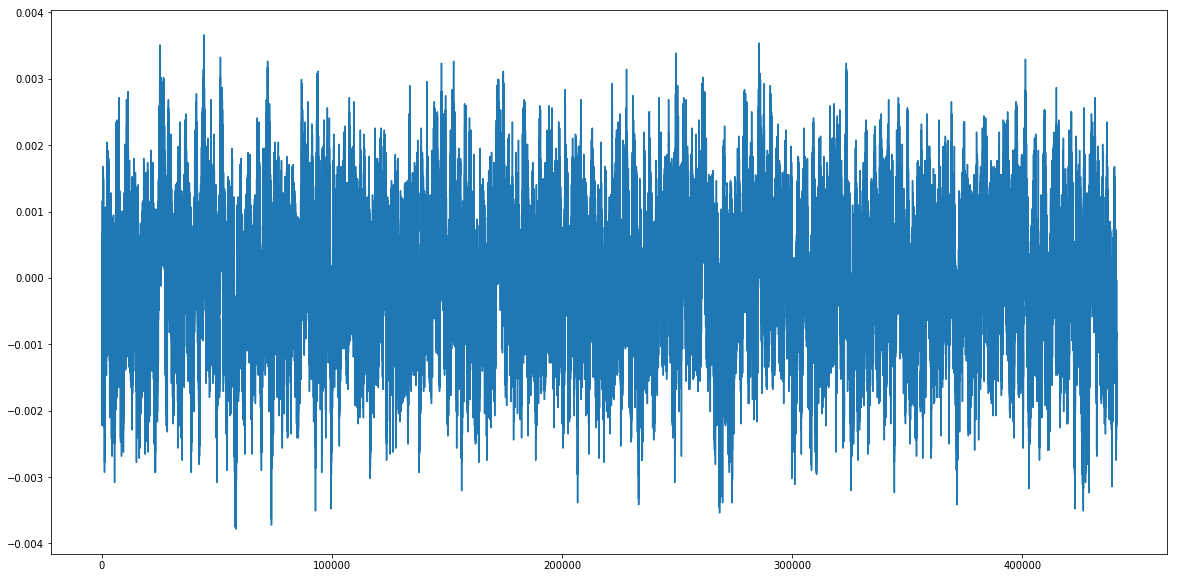

In [15]:
plt.figure(figsize=(20,10))##change the size of the charts
plt.plot(M6_plastic)
plt.show()

In [45]:
##fft filtering testing https://plot.ly/python/fft-filters/
#data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')
M6 = np.ravel(M6_plastic)
M6.shape

(441000,)

In [46]:
fc = 0.1
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)
 
sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

new_signal = np.convolve(M6, sinc_func)

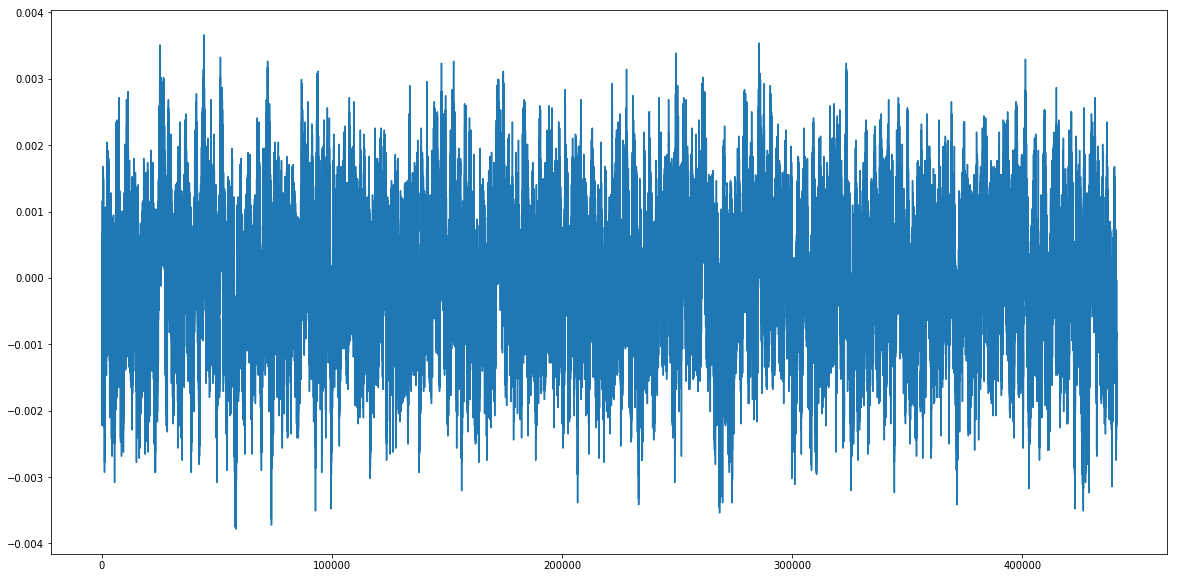

In [48]:
plt.figure(figsize=(20,10))##change the size of the charts
plt.plot(M6)
plt.show()